# Epymorph dev log: June 16th, 2023

_author: Tyler Coles_

_as of git hash: TBD_

In [1]:
from sympy import exp, log

from epymorph.ipm_exp import (CompartmentalIpmBuilder, CompartmentModel,
                              CompartmentSymbols, Edge, Geo, Param)

# Create model

cs = CompartmentSymbols.create(
    compartments=['S', 'I', 'R'],
    attributes=[
        Param('D', 'infection_duration', shape='S', dtype='float'),
        Param('L', 'immunity_duration', shape='S', dtype='float'),
        Geo('H', 'humidity', shape='TxN', dtype='float'),
    ])

[S, I, R] = cs.compartments
[D, L, H] = cs.attributes

beta = (exp(-180 * H + log(2.0 - 1.3)) + 1.3) / D

pei_sir_model = CompartmentModel(
    symbols=cs,
    transitions=[
        Edge(S, I, rate=beta * S * I / (S + I + R)),
        Edge(I, R, rate=I / D),
        Edge(R, S, rate=R / L)
    ])

ipm_builder = CompartmentalIpmBuilder(pei_sir_model)


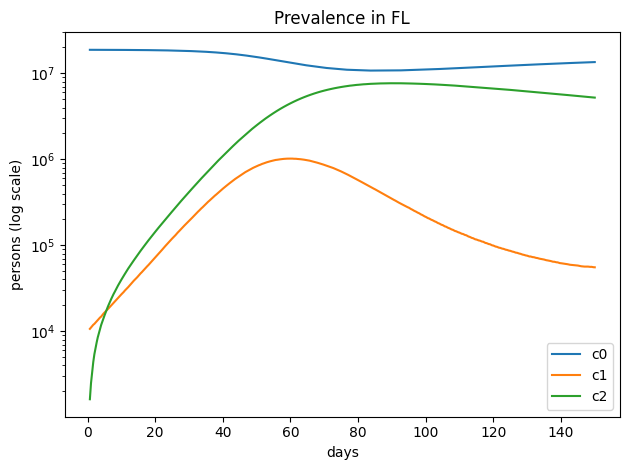

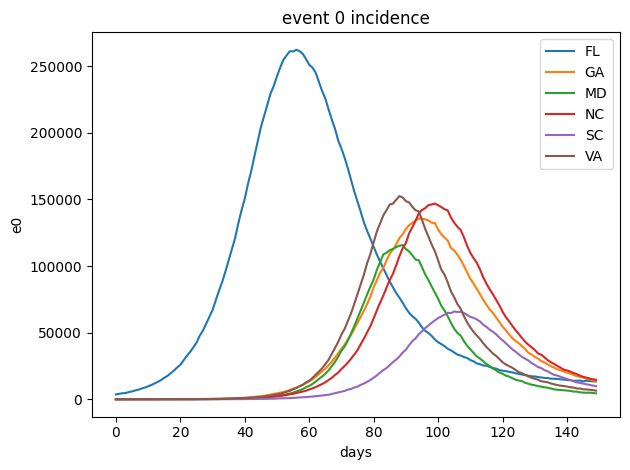

In [2]:
from datetime import date

from epymorph.data import geo_library, mm_library
from epymorph.run import plot_event, plot_pop
from epymorph.simulation import Simulation

# Run simulation

sim = Simulation(
    geo_library['pei'](),
    ipm_builder,
    mm_library['pei']())

out = sim.run(
    param={
        'theta': 0.1,
        'move_control': 0.9,
        'infection_duration': 4,
        'immunity_duration': 90.0,
        'infection_seed_loc': 0,
        'infection_seed_size': 10_000
    },
    start_date=date(2015, 1, 1),
    duration_days=150
)

plot_pop(out, 0)
plot_event(out, 0)
